In [2]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [47]:
def gen(arr,step,n):
    res=[]
    for i in arr:
        res.append([x for x in [i+j*step for j in range(-n,n+1)]])
    return res



ret = (gen([0.14, 0.29, 0.57, 1.00, 0.75, 0.96, 0.58, 0.52, 0.99], 0.01,2))
y = []
for i in range(5):
    x = []
    for j in range(9):
        x.append(float("{:.2f}".format(ret[j][i])))
    y.append(x)

for x in y:
    print(x, end=',\n')

[0.12, 0.27, 0.55, 0.98, 0.73, 0.94, 0.56, 0.5, 0.97],
[0.13, 0.28, 0.56, 0.99, 0.74, 0.95, 0.57, 0.51, 0.98],
[0.14, 0.29, 0.57, 1.0, 0.75, 0.96, 0.58, 0.52, 0.99],
[0.15, 0.3, 0.58, 1.01, 0.76, 0.97, 0.59, 0.53, 1.0],
[0.16, 0.31, 0.59, 1.02, 0.77, 0.98, 0.6, 0.54, 1.01],


In [50]:

x_train = [
    
[0.86, 0.96, 0.86, 0.97, 0.6, 0.92, 0.94, 0.87, 0.93],
[0.87, 0.97, 0.87, 0.98, 0.61, 0.93, 0.95, 0.88, 0.94],
[0.88, 0.98, 0.88, 0.99, 0.62, 0.94, 0.96, 0.89, 0.95],
[0.89, 0.99, 0.89, 1.0, 0.63, 0.95, 0.97, 0.9, 0.96],
[0.9, 1.0, 0.9, 1.01, 0.64, 0.96, 0.98, 0.91, 0.97], 
    
[-0.02, 0.1, 0.0, 0.65, 0.83, 0.21, 0.01, 0.13, -0.02],
[-0.01, 0.11, 0.01, 0.66, 0.84, 0.22, 0.02, 0.14, -0.01],
[0.0, 0.12, 0.02, 0.67, 0.85, 0.23, 0.03, 0.15, 0.0],
[0.01, 0.13, 0.03, 0.68, 0.86, 0.24, 0.04, 0.16, 0.01],
[0.02, 0.14, 0.04, 0.69, 0.87, 0.25, 0.05, 0.17, 0.02],
    
[0.22, 0.53, 0.07, 0.75, 0.84, 0.7, 0.95, 0.73, 0.86],
[0.23, 0.54, 0.08, 0.76, 0.85, 0.71, 0.96, 0.74, 0.87],
[0.24, 0.55, 0.09, 0.77, 0.86, 0.72, 0.97, 0.75, 0.88],
[0.25, 0.56, 0.1, 0.78, 0.87, 0.73, 0.98, 0.76, 0.89],
[0.26, 0.57, 0.11, 0.79, 0.88, 0.74, 0.99, 0.77, 0.9],
    
[0.15, 0.29, 0.34, 0.98, 0.96, 0.16, 0.09, 0.09, 0.96],
[0.16, 0.3, 0.35, 0.99, 0.97, 0.17, 0.1, 0.1, 0.97],
[0.17, 0.31, 0.36, 1.0, 0.98, 0.18, 0.11, 0.11, 0.98],
[0.18, 0.32, 0.37, 1.01, 0.99, 0.19, 0.12, 0.12, 0.99],
[0.19, 0.33, 0.38, 1.02, 1.0, 0.2, 0.13, 0.13, 1.0],
    
[0.42, 0.68, 0.4, 0.97, 0.67, 0.92, 0.63, 0.93, 0.82],
[0.43, 0.69, 0.41, 0.98, 0.68, 0.93, 0.64, 0.94, 0.83],
[0.44, 0.7, 0.42, 0.99, 0.69, 0.94, 0.65, 0.95, 0.84],
[0.45, 0.71, 0.43, 1.0, 0.7, 0.95, 0.66, 0.96, 0.85],
[0.46, 0.72, 0.44, 1.01, 0.71, 0.96, 0.67, 0.97, 0.86],
    
[0.29, 0.96, 0.24, 0.98, 0.76, 0.95, 0.96, 0.79, 0.77],
[0.3, 0.97, 0.25, 0.99, 0.77, 0.96, 0.97, 0.8, 0.78],
[0.31, 0.98, 0.26, 1.0, 0.78, 0.97, 0.98, 0.81, 0.79],
[0.32, 0.99, 0.27, 1.01, 0.79, 0.98, 0.99, 0.82, 0.8],
[0.33, 1.0, 0.28, 1.02, 0.8, 0.99, 1.0, 0.83, 0.81],
    
[0.01, 0.96, 0.08, 0.98, 0.76, 0.88, 0.95, 0.32, 0.96],
[0.02, 0.97, 0.09, 0.99, 0.77, 0.89, 0.96, 0.33, 0.97],
[0.03, 0.98, 0.1, 1.0, 0.78, 0.9, 0.97, 0.34, 0.98],
[0.04, 0.99, 0.11, 1.01, 0.79, 0.91, 0.98, 0.35, 0.99],
[0.05, 1.0, 0.12, 1.02, 0.8, 0.92, 0.99, 0.36, 1.0],
    
[0.14, 0.96, 0.13, 0.94, 0.78, 0.75, 0.96, 0.68, 0.58],
[0.15, 0.97, 0.14, 0.95, 0.79, 0.76, 0.97, 0.69, 0.59],
[0.16, 0.98, 0.15, 0.96, 0.8, 0.77, 0.98, 0.7, 0.6],
[0.17, 0.99, 0.16, 0.97, 0.81, 0.78, 0.99, 0.71, 0.61],
[0.18, 1.0, 0.17, 0.98, 0.82, 0.79, 1.0, 0.72, 0.62],

[0.05, 0.96, 0.8, 0.98, 0.5, 0.93, 0.96, 0.96, 0.96],
[0.06, 0.97, 0.81, 0.99, 0.51, 0.94, 0.97, 0.97, 0.97],
[0.07, 0.98, 0.82, 1.0, 0.52, 0.95, 0.98, 0.98, 0.98],
[0.08, 0.99, 0.83, 1.01, 0.53, 0.96, 0.99, 0.99, 0.99],
[0.09, 1.0, 0.84, 1.02, 0.54, 0.97, 1.0, 1.0, 1.0],

[0.2, 0.32, 0.12, 0.87, 0.73, 0.92, 0.54, 0.45, 0.58],
[0.21, 0.33, 0.13, 0.88, 0.74, 0.93, 0.55, 0.46, 0.59],
[0.22, 0.34, 0.14, 0.89, 0.75, 0.94, 0.56, 0.47, 0.6],
[0.23, 0.35, 0.15, 0.9, 0.76, 0.95, 0.57, 0.48, 0.61],
[0.24, 0.36, 0.16, 0.91, 0.77, 0.96, 0.58, 0.49, 0.62],
    

[0.12, 0.27, 0.55, 0.98, 0.73, 0.94, 0.56, 0.5, 0.97],
[0.13, 0.28, 0.56, 0.99, 0.74, 0.95, 0.57, 0.51, 0.98],
[0.14, 0.29, 0.57, 1.0, 0.75, 0.96, 0.58, 0.52, 0.99],
[0.15, 0.3, 0.58, 1.01, 0.76, 0.97, 0.59, 0.53, 1.0],
[0.16, 0.31, 0.59, 1.02, 0.77, 0.98, 0.6, 0.54, 1.01]
    

]

y_train = [
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],

    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],

    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],

    [0,0,0,0,0,1,0,1,0],
    [0,0,0,0,0,1,0,1,0],
    [0,0,0,0,0,1,0,1,0],
    [0,0,0,0,0,1,0,1,0],
    [0,0,0,0,0,1,0,1,0]
]

x_train = np.array(x_train, dtype = np.float32)
y_train = np.array(y_train)

In [51]:
model = Sequential()

IN = x_train.shape[1]

HIDDEN = IN + 1
OUT = y_train.shape[1]


model.add(Dense(units=HIDDEN, activation='sigmoid', input_dim=IN))
model.add(Dense(units=OUT, activation='linear')) #if possible use linear

model.compile(loss = 'mean_squared_error', optimizer=optimizers.SGD(lr=0.4))

In [52]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

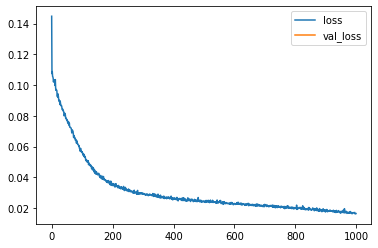

In [53]:
model.fit(x_train, y_train, epochs=1000, batch_size=8, verbose=False, callbacks=[plot_losses])

In [54]:
predictions = model.predict(x_train).tolist()
for i, prediction in enumerate(predictions):
    print('model:\t', np.round(prediction,3))
    print('label:\t', y_train[i])
    print(' ')

2/2 [==============================] - 0s 3ms/step
model:	 [-0.017 -0.01   0.005 -0.005  0.002  0.049 -0.029 -0.037  0.024]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0.019 -0.01   0.005 -0.006  0.002  0.034 -0.013 -0.029  0.032]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0.02  -0.01   0.006 -0.006  0.002  0.018  0.004 -0.02   0.041]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0.021 -0.01   0.006 -0.006  0.002  0.003  0.021 -0.012  0.049]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0.022 -0.01   0.007 -0.006  0.003 -0.013  0.037 -0.004  0.057]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 2.200e-02  2.000e-02 -1.100e-02  1.000e-03 -6.000e-03  1.030e-01
 -1.440e-01 -4.400e-02  1.201e+00]
label:	 [0 0 0 0 0 0 0 0 1]
 
model:	 [ 0.019  0.018 -0.011  0.    -0.005  0.095 -0.128 -0.029  1.213]
label:	 [0 0 0 0 0 0 0 0 1]
 
model:	 [ 1.600e-02  1.600e-02 -1.000e-02 -1.000e-03 -4.000e-03  8.700e-02
 -1.130e-01 -1.400e-02  1.225e+00]
label:	 [0 0 0 0 0 0 0 0 1]
 
model:	 [ 1.300e-02  1.400e-02 -9.000e-03 -1.000e-0

In [55]:
def to_str(name, W):
    s = str(W.tolist()).replace('[', '{').replace(']', '}')
    return 'float '+name+'['+str(W.shape[0])+']['+str(W.shape[1])+'] = ' + s + ';'

In [56]:
# output weights as strings you can copy into arduino sketch
W1 = np.vstack((K.eval(model.weights[0]), K.eval(model.weights[1])))
W2 = np.vstack((K.eval(model.weights[2]), K.eval(model.weights[3])))

print('// replace these two lines in arduino code:')
print('// float HiddenWeights[InputNodes+1][HiddenNodes]')
print('// float OutputWeights[HiddenNodes+1][OutputNodes]')
print('// With trained weights below.')
print('\n')
print('// You also have to disable the initial weight randomization')
print('// you can find it under this section in the arduino code:')
print('//* Initialize HiddenWeights and ChangeHiddenWeights ')
print('\n')
print(to_str('HiddenWeights', W1))
print(to_str('OutputWeights', W2))

// replace these two lines in arduino code:
// float HiddenWeights[InputNodes+1][HiddenNodes]
// float OutputWeights[HiddenNodes+1][OutputNodes]
// With trained weights below.


// You also have to disable the initial weight randomization
// you can find it under this section in the arduino code:
//* Initialize HiddenWeights and ChangeHiddenWeights 


float HiddenWeights[10][10] = {{0.07253871113061905, -0.11016316711902618, -0.8870688676834106, 1.1655160188674927, 1.2815383672714233, 0.48302099108695984, -0.8054625391960144, -0.7840881943702698, 0.4611206352710724, 0.4060262143611908}, {1.135010838508606, -1.5197639465332031, -0.558091402053833, 0.7006745934486389, -0.541337251663208, -0.9325408339500427, -0.7278292775154114, -0.31941038370132446, -0.35210150480270386, 0.22538113594055176}, {-1.1223825216293335, 0.8211764097213745, -0.1406533271074295, -0.4709177017211914, -0.2564251124858856, 1.3825627565383911, -0.04079524055123329, 0.2783917486667633, 0.45201098918914795, 0.3632502